# Coursework: Climate data analysis

In [76]:
# python packages needed. You can, of course, use others if you need them.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy as scipy
import pickle as pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error

## TASK I - Preliminary analysis

**a. Import the `weather-denmark-resampled.pkl` dataset  provided  in  the  folderand explore  the dataset by answering the following questions.**

In [77]:
# Loading .pkl files 

f_dp = open('df_perth.pkl', 'rb')
f_wdr = open('weather-denmark-resampled.pkl', 'rb')

# print(pickle.load(f_dp))
df = pd.read_pickle(f_wdr)
print(df)

                      Aalborg                                     Aarhus  \
                         Temp     Pressure  WindSpeed     WindDir   Temp   
DateTime                                                                   
1980-03-01 10:00:00  4.333333  1007.533333  11.266667  286.666667    4.0   
1980-03-01 11:00:00  5.000000  1007.766667  10.200000  280.000000    5.0   
1980-03-01 12:00:00  5.000000  1008.000000  10.300000  290.000000    5.0   
1980-03-01 13:00:00  5.000000  1008.066667   9.700000  290.000000    5.0   
1980-03-01 14:00:00  4.333333  1008.133333  11.100000  283.333333    5.0   
...                       ...          ...        ...         ...    ...   
2018-03-01 19:00:00 -4.400000  1024.200000   7.200000   70.000000   -3.6   
2018-03-01 20:00:00 -4.300000  1023.700000   6.700000   70.000000   -3.9   
2018-03-01 21:00:00 -3.900000  1023.100000   8.800000   80.000000   -3.5   
2018-03-01 22:00:00 -3.800000  1022.900000   7.200000   70.000000   -3.5   
2018-03-01 2

In [78]:
################################### 
# i.How many cities are there in the dataset?

# df.columns
# print(len(df.columns) / 4)
city = "none"
city_numbers = 0
for i in range(len(df.columns)):
    if df.columns[i][0] != city:
        city = df.columns[i][0]
        city_numbers += 1
print(city_numbers)

###################################

5


In [79]:
###############################
# ii.How many observations and features are there in this dataset?

city = df.columns[0][0]
features_numbers = 0
for i in range(len(df.columns)):
    if df.columns[i][0] != city:
        break
    else:
        features_numbers += 1
print(features_numbers)

###############################

4


In [80]:
###############################
# iii.What are the names of the different features?

features_list = []
for i in range(features_numbers):
    features_list.append(df.columns[i][1])
print(features_list)

###############################

['Temp', 'Pressure', 'WindSpeed', 'WindDir']


**b. Now that you got confident with the dataset, evaluate if the dataset contains anymissing values? If so, then remove them using the pandas built-in function.**



In [81]:
###########################

df = df.dropna(how='any')

###########################

**c. Extract the general statistical properties summarising the minimum, maximum, median, mean and standard deviation values for all the features in the dataset. Spot any anomalies in these properties and clearly explain why you classify them as anomalies.**

In [82]:
###########################

print("min: \n")
print(df.min())
print("\n")

print("max: \n")
print(df.max())
print("\n")

print("median: \n")
print(df.median())
print("\n")

print("mean: \n")
print(df.mean())
print("\n")

print("standard deviation: \n")
print(df.std())
print("\n")

###########################

min: 

Aalborg   Temp         -25.000000
          Pressure     951.900000
          WindSpeed      0.000000
          WindDir       10.000000
Aarhus    Temp         -24.300000
          Pressure     955.500000
          WindSpeed      0.000000
          WindDir       10.000000
Esbjerg   Temp         -27.000000
          Pressure     959.300000
          WindSpeed      0.000000
          WindDir       10.000000
Odense    Temp         -22.500000
          Pressure     959.700000
          WindSpeed      0.000000
          WindDir       10.000000
Roskilde  Temp         -21.833333
          Pressure     959.800000
          WindSpeed      0.000000
          WindDir       10.000000
dtype: float64


max: 

Aalborg   Temp           30.800000
          Pressure     1050.800000
          WindSpeed      32.900000
          WindDir       360.000000
Aarhus    Temp           30.900000
          Pressure     1050.000000
          WindSpeed      33.400000
          WindDir       360.000000
Esbjerg  

## TASK II - OUTLIERS

The second task is focused on spotting and overcoming outliers. Follow the instructions in the following:

**d. Store the temperature measurements in May 2006 for the city of Odense. Then produce a simple plot of the temperature versus time.**

*HINT: In this dataset, the cities are vertically stacked. Therefore, we have a multi column dataset, which basically works as a nested dictionary.*

<AxesSubplot:xlabel='DateTime'>

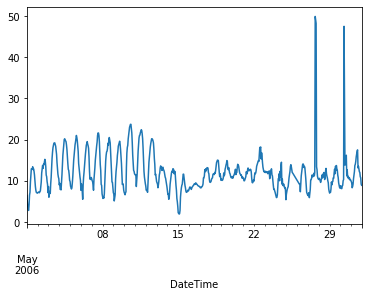

In [107]:
###########################

df['Odense']['Temp']['2006-05'].plot()

###########################

**e. Find the outliers in this set of measurements (if any) and replace them using linear interpolation.**

<AxesSubplot:xlabel='DateTime'>

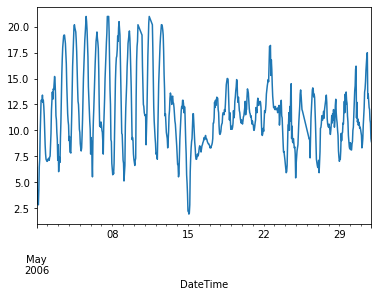

In [152]:
###########################

col = df['Odense']['Temp']['2006-05']
median = col.median()
mad = col.mad()

def get_zscore(x):
    return (x - median) / mad

def temp_map(x):
    temp_val = np.nan if get_zscore(x) > 3 else x
    return temp_val

col = col.map(temp_map)
col = col.fillna(col.interpolate())
col.plot()

###########################

## TASK III.1 - CORRELATION

In this last task, you will be seeking correlation between features of the data and inferring hidden patterns.  For  this  task,  you  will  be  working  with  a  smaller  dataset.  Follow  the  instructions  in  the following:

**f. We  now  take  a new  dataset (`df_perth.pkl`),  which  collects  climate  data  of  a  city  in Australia. Here we have just one year of measurements, but more features.**

In [85]:
#################################


#################################

**g. Find any significant correlations between features.**

*HINT: you might find useful looking fortrends and recurrent patterns within the data*

In [86]:
#################################


#################################

**h. We now focus on the correlation between precipitation and cloud cover. We want to infer the probability of having moderate to heavy rain (> 1 mm/h) as a function of the cloud cover index.**

*HINT: you might find useful to create a new column where you have 0 if precipitation < 1 mm/h and 1 otherwise*

In [87]:
#################################


#################################

## TASK III.2 - INFERENCE

**i. Let’s now assume that we want to predict the photovoltaic production (PV production) using  multiple  linear  regression.  Explain  which  features  are  statistically  significant  in modelling the target variable.**

In [88]:
#################################


#################################

**j. Create a multivariate model using the predictors chosen in the previous question.**

In [89]:
#################################


#################################
